In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

###  Acceleration Methods

While the different methods proposed in Chapter 3 and this chapter seem to require comparison, we do not expect there to be any clear-cut domination (as was the case with the comparison between Accept-Reject and importance sampling in Section 3.3.3). Instead, we look at more global acceleration strategies, which are more or less independent of the simulation setup but try to exploit the output of the simulation in more efficient ways.

The acceleration methods described below can be used not only in a single implementation but also as a control device to assess the convergence of a simulation algorithm, following the argument of parallel estimators. For example, if $ \hat{S}_m $ and $ \hat{S}_p $ are $ p $-convergent estimators of the same quantity $ \theta $, a stopping rule for convergence is that $ \hat{S}_m $ and $ \hat{S}_p $ are identical or, given a minimum precision requirement $ \epsilon $, that

$$
\max_{1 \leq i \leq p} | \hat{S}_m - \hat{S}_p | < \epsilon,
$$

as in Section 4.1.

### 4.4.1 Antithetic Variables

Although the usual simulation methods lead to iid samples (or quasi-iid, see Section 2.6.2), it may actually be preferable to generate samples of correlated variables when estimating an integral $ \theta $, as they may reduce the variance of the corresponding estimator.

A first setting where the generation of independent samples is less desirable corresponds to the comparison of two quantities which are close in value. If

$$
J_1 = \int_{7} \phi(x) f(x) \, dx \quad \text{and} \quad J_2 = \int_{9} \phi_2(x) f_2(x) \, dx,
$$

are two such quantities, where $ J_1 $ estimates $ \theta $, and $ J_2 $ estimates $ J_2 $, independently of $ J_1 $, the variance of $ (\hat{S}_1, \hat{S}_2) $ is then

$$
\text{var}(\hat{S}_1) + \text{var}(\hat{S}_2),
$$

which may be too large to support a fine enough analysis on the difference $ \theta_1 - \theta_2 $. However, if $ \hat{S}_1 $ and $ \hat{S}_2 $ are positively correlated, the variance is reduced by a factor of $ -2 \text{cov}(\hat{S}_1, \hat{S}_2) $, which may greatly improve the analysis of the difference.

### A Convincing Illustration of the Improvement Brought by Correlated Samples

A convincing illustration of the improvement brought by correlated samples is the comparison of (regular) statistical estimators via simulation. Given a density $ f(x_0) $ and a loss function $ L(\hat{\theta}, \theta) $, two estimators $ \hat{\theta}_1 $ and $ \hat{\theta}_2 $ are evaluated through their risk functions:

$$
R(\hat{\theta}_1, \theta) = \mathbb{E}[L(\hat{\theta}_1, \theta)] \quad \text{and} \quad R(\hat{\theta}_2, \theta).
$$

In general, these risk functions are not available analytically, but they may be approximated, for instance, by a regular Monte Carlo method:

$$
R(\hat{\theta}_1, \theta) = \frac{1}{m} \sum_{i=1}^{m} L(\hat{\theta}_1(X_i), \theta),
$$

and

$$
R(\hat{\theta}_2, \theta) = \frac{1}{m} \sum_{i=1}^{m} L(\hat{\theta}_2(Y_i), \theta),
$$

where $ X_i $ and $ Y_i $ are simulated from the density $ f(x_0) $. Positive correlation between $ L(\hat{\theta}_1(X_i), \theta) $ and $ L(\hat{\theta}_2(Y_i), \theta) $ then reduces the variability of the approximation of $ R(\hat{\theta}_1, \theta) - R(\hat{\theta}_2, \theta) $.

Before continuing with the development in this section, we pause to make two elementary remarks that should be observed in any simulation comparison.

1. **Same Sample for Both Estimators**: 
   - First, the same sample $ (X_1, \dots, X_m) $ should be used in the evaluation of $ R(\hat{\theta}_1, \theta) $ and $ R(\hat{\theta}_2, \theta) $. This repeated use of a single sample greatly improves the precision of the estimated difference $ R(\hat{\theta}_1, \theta) - R(\hat{\theta}_2, \theta) $, as shown by the comparison of the variances of $ R(\hat{\theta}_1, \theta) - R(\hat{\theta}_2, \theta) $ and of

   $$
   \frac{1}{m} \sum_{i=1}^{m} \left[ L(\hat{\theta}_1(X_i), \theta) - L(\hat{\theta}_2(X_i), \theta) \right].
   $$

2. **Same Sample for Every Value of $ \theta $**:
   - Second, the same sample should be used for the comparison of risks for every value of $ \theta $. Although this sounds like an absurd recommendation since the sample $ (X_1, X_m) $ is usually generated from a distribution depending on $ \theta $, it is often the case that the same uniform sample can be used for the generation of the $ X_i $'s for every value of $ \theta $. Also, in many cases, there exists a transformation $ M_\theta $ such that if $ X^\theta \sim f(X) $, then $ M_\theta X^\theta \sim f(X_\theta) $. A single sample $ (X_1, \dots, X_m) $ from $ f(X_0) $ is then sufficient to produce a sample from $ f(X_\theta) $ by the transformation $ M_\theta $. This second remark is somewhat tangential to the theme of this section; however, it brings significant improvement in the practical implementation of Monte Carlo methods.

### Variance Reduction

The variance reduction associated with the conservation of the underlying uniform sample is obvious in the graphs of the resulting risk functions, which then miss the irregular peaks of graphs obtained with independent samples and allow for an easier comparison of estimators. 

For instance, see the graphs in Figure 3.4, which are based on samples generated independently for each value of $ \theta $. By comparison, an evaluation based on a single sample corresponding to $ \lambda = 1 $ would give a constant risk in the exponential case.



### Example. James-Stein Estimation

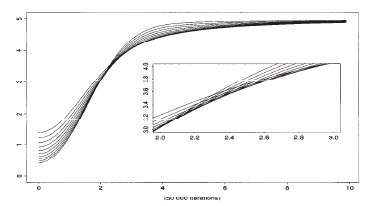


Fig.10. Approximate squared error risks of truncated James-Stein estimators for a normal distribution Ns (0, Is), as a function of ||0||. The inset gives a magnification of the intersection zone for the risk functions.

In the case $ X \sim N(0, I_p) $, the transform is the location shift $ M_X = X + \theta_0 $, where $ \theta_0 $ is the location parameter. When studying positive-part James-Stein estimators

$$
\hat{\theta}_a(\mathbf{X}) = (1 - \lambda) \mathbf{X}, \quad 0 < \lambda < 2(p - 2),
$$

(see Robert 2001, Chapter 2, for motivation), the squared error risk of $ \hat{\theta}_a $ can be computed "explicitly," but the resulting expression involves several special functions (Robert 1988). Therefore, the approximation of the risks by simulation is much more helpful in comparing these estimators. 

Fig.10 illustrates this comparison in the case $ p = 5 $ and exhibits a crossing phenomenon for the risk functions in the same region. However, as shown by the inset, the crossing point for the risks of $ \hat{\theta}_a $ and $ \hat{\theta}_b $ depends on $ (\alpha, c) $.

#### Fig.10:
Approximate squared error risks of truncated James-Stein estimators for a normal distribution $ N(0, I_s) $, as a function of $ \|\theta\| $. The inset gives a magnification of the intersection zone for the risk functions.

### Correlation Between $ \hat{\theta}_1 $ and $ \hat{\theta}_2 $

In a more general setup, creating a strong enough correlation between $ \hat{\theta}_1 $ and $ \hat{\theta}_2 $ is rarely so simple, and the quest for correlation can result in an increase in the conception and simulation burdens, which may even have a negative overall effect on the efficiency of the analysis. Indeed, using the same uniform sample for the generation of variables distributed from $ f_1 $ and $ f_2 $ in equation (4.16) is only possible when there exists a simple transformation from $ f_1 $ to $ f_2 $. 

For instance, if $ f_1 $ or $ f_2 $ must be simulated by Accept-Reject methods, the use of random numbers from uniform distributions prevents the use of a common sample.


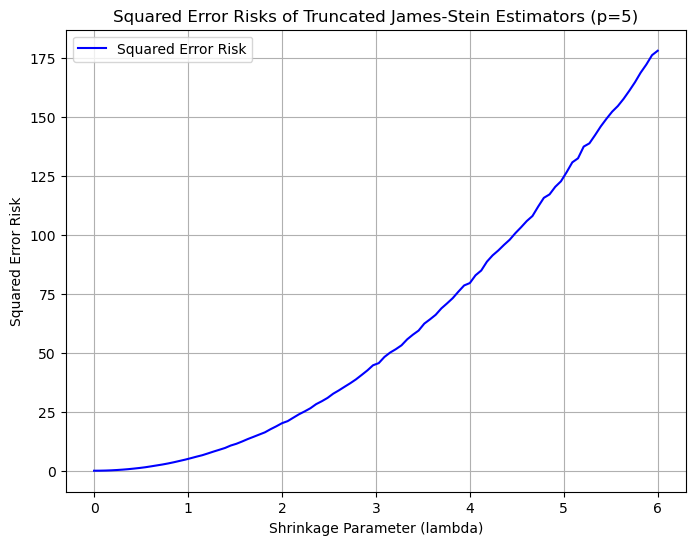

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the James-Stein estimator
def james_stein_estimator(X, lam):
    """
    Positive-part James-Stein estimator for a vector X with a shrinkage factor lambda.
    """
    return (1 - lam) * X

# Define the squared error risk for the estimator
def squared_error_risk(X, estimator):
    """
    Calculate the squared error risk for an estimator compared to the true parameter.
    """
    return np.sum((estimator - X) ** 2)

# Simulation function to estimate the risk for truncated James-Stein estimators
def simulate_james_stein_risk(p, lam_values, num_simulations=10000):
    """
    Simulate the squared error risks for truncated James-Stein estimators.
    Arguments:
    - p: Dimension of the parameter space
    - lam_values: Array of shrinkage values (lambda)
    - num_simulations: Number of simulations to run
    """
    risks = np.zeros(len(lam_values))
    for i, lam in enumerate(lam_values):
        total_risk = 0
        for _ in range(num_simulations):
            # Generate a random sample from N(0, I_p)
            X = np.random.normal(0, 1, p)
            # Apply the James-Stein estimator
            estimator = james_stein_estimator(X, lam)
            # Calculate the squared error risk
            total_risk += squared_error_risk(X, estimator)
        # Average the risk over all simulations
        risks[i] = total_risk / num_simulations
    return risks

# Main function to plot the risk functions
def plot_james_stein_risk(p, lam_values):
    risks = simulate_james_stein_risk(p, lam_values)
    
    # Plotting the results
    plt.figure(figsize=(8, 6))
    plt.plot(lam_values, risks, label='Squared Error Risk', color='blue')
    plt.title(f'Squared Error Risks of Truncated James-Stein Estimators (p={p})')
    plt.xlabel('Shrinkage Parameter (lambda)')
    plt.ylabel('Squared Error Risk')
    plt.grid(True)
    plt.legend()
    plt.show()

# Parameters
p = 5  # Dimension
lam_values = np.linspace(0, 2*(p - 2), 100)  # Range of lambda values

# Plot the squared error risks
plot_james_stein_risk(p, lam_values)


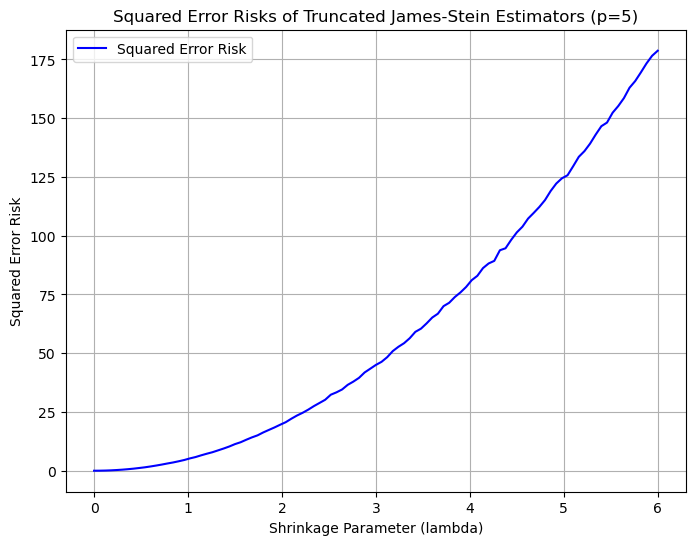

In [4]:
import random
import math
import matplotlib.pyplot as plt

# Define the James-Stein estimator
def james_stein_estimator(X, lam):
    """
    Positive-part James-Stein estimator for a vector X with a shrinkage factor lambda.
    """
    return [(1 - lam) * x for x in X]

# Define the squared error risk for the estimator
def squared_error_risk(X, estimator):
    """
    Calculate the squared error risk for an estimator compared to the true parameter.
    """
    return sum((estimator[i] - X[i]) ** 2 for i in range(len(X)))

# Simulation function to estimate the risk for truncated James-Stein estimators
def simulate_james_stein_risk(p, lam_values, num_simulations=10000):
    """
    Simulate the squared error risks for truncated James-Stein estimators.
    Arguments:
    - p: Dimension of the parameter space
    - lam_values: List of shrinkage values (lambda)
    - num_simulations: Number of simulations to run
    """
    risks = [0] * len(lam_values)
    for i, lam in enumerate(lam_values):
        total_risk = 0
        for _ in range(num_simulations):
            # Generate a random sample from N(0, I_p) using the random module
            X = [random.gauss(0, 1) for _ in range(p)]
            # Apply the James-Stein estimator
            estimator = james_stein_estimator(X, lam)
            # Calculate the squared error risk
            total_risk += squared_error_risk(X, estimator)
        # Average the risk over all simulations
        risks[i] = total_risk / num_simulations
    return risks

# Main function to plot the risk functions
def plot_james_stein_risk(p, lam_values):
    risks = simulate_james_stein_risk(p, lam_values)
    
    # Plotting the results manually
    plt.figure(figsize=(8, 6))
    plt.plot(lam_values, risks, label='Squared Error Risk', color='blue')
    plt.title(f'Squared Error Risks of Truncated James-Stein Estimators (p={p})')
    plt.xlabel('Shrinkage Parameter (lambda)')
    plt.ylabel('Squared Error Risk')
    plt.grid(True)
    plt.legend()
    plt.show()

# Parameters
p = 5  # Dimension
lam_values = [i * (2 * (p - 2)) / 100 for i in range(101)]  # Range of lambda values

# Plot the squared error risks
plot_james_stein_risk(p, lam_values)


## Antithetic Variables Method

The method of **antithetic variables** is based on the idea that higher efficiency can be achieved by inducing correlation between samples. Given two samples $ (X_1, \dots, X_m) $ and $ (Y_1, \dots, Y_m) $ from a distribution $ f $, used for the estimation of:

$$
\int h(x) f(x) \, dx,
$$

the estimator

$$
\hat{\theta} = \frac{1}{2m} \sum_{i=1}^{m} \left[ h(X_i) + h(Y_i) \right]
$$

is more efficient than an estimator based on an independent and identically distributed (iid) sample of size $ 2m $, if the variables $ h(X_i) $ and $ h(Y_i) $ are **negatively correlated**. In this setting, the $ Y_i $'s are called the **antithetic variables**, and it remains to develop a method for generating these variables in an optimal (or at least useful) way.

However, the correlation between $ h(X_i) $ and $ h(Y_i) $ depends both on the pair $ (X_i, Y_i) $ and on the function $ h $. For instance, if $ h $ is even, $ X_i $ has mean 0, and $ X_i $ and $ Y_i $ are negatively correlated, but $ h(X_i) = h(Y_i) $.

A solution proposed by Rubinstein (1981) is to use uniform variables $ U_i $ to generate the $ X_i $'s and the variables $ 1 - U_i $ to generate the $ Y_i $'s. The argument goes as follows: if $ H = h(F^{-1}(U_i)) $, then $ Y_i = F^{-1}(1 - U_i) $, and $ h(X_i) $ and $ h(Y_i) $ are negatively correlated when $ h $ is a monotone function. However, such a constraint is often difficult to verify, and moreover, this technique only applies to direct transformations of uniform variables, thus excluding methods like **Accept-Reject**.

Ceweke (1988) proposed the implementation of an inversion method for the $ X_i $'s, where $ Y_i = 2\mu - X_i $ when $ f $ is symmetric around $ \mu $. With some additional conditions on the function $ h $, the improvement brought by antithetic variables is quite substantial for large sample sizes $ m $. Empirical extensions of this approach can be used in cases where $ f $ is not symmetric by replacing $ \mu $ with the mode or the median of the associated distribution. Furthermore, if $ f $ is unknown (or $ \mu $ is unknown), $ \mu $ can be estimated from a first sample (though caution is advised!).

More general group actions can also be considered, as in Kong et al. (2003), where the authors replace the standard average by an average over the group of transformations $ g $, and use an average of the averages of $ h(g X_i) $.

### Example  (Continuation of Example )

Assume, for the sake of illustration, that the noncentral chi-squared variables $ ||X||^2 $ are simulated...

## Antithetic Variables for Normal Random Variables

From normal random variables \( X_i \sim N(0, I_p) \), we can create negative correlation by using \( Y_i = 2\mu - X_i \), which has a correlation of -1 with \( X_i \), to produce a second sample \( Y_i \). However, the negative correlation does not necessarily transfer to the pairs \( (h(X_i), h(Y_i)) \).

Figure 4.11 illustrates the behavior of the antithetic estimator (4.17) for

$$
h_1(\|X\|^2) = \|X\|^2
$$

and

$$
h_2(\|X\|^2) = \|X\|^{2p} + p,
$$

when $ m = 500 $ and $ p = 4 $, compared to an estimator based on an iid sample of size $ 2m $. As shown by the graphs in Fig.11, although the correlation between $ h_1(\|X\|) $ and $ h(Y) $ is actually positive for small values of $ \|X\|^2 $, the improvement brought by (4.17) over the standard average is quite impressive in the case of $ h_1 $. The setting is less clear for $ h_2 $, but the variance of the terms in (4.17) is much smaller than its independent counterpart.

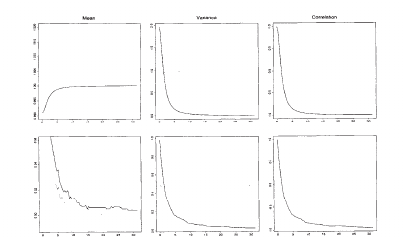


Fig.11. Average of the antithetic estimator (4.17) (solid lines) against the aver- age of an standard iid estimate (dots) for the estimation of Eh1(||X||)] (upper left) and Ehe(||X||)] (lower left), along with the empirical variance of hi(X) + hi (Y) (upper center) and ha(X) + ha(Y) (lower center), and the correlation between. hi (X) and ha||Y) (upper right) and between ha(||X||2) and ha(||Y||2) (lower right), for m = 500 and p = 4. The horizontal axis is scaled in terms of ||0|| and the values in the upper left graph are divided by the true expectation, ||0||+p, and the values in the upper central graph are divided by 8||0||2 + 4p.

### Fig.11

- **Upper Left**: Average of the antithetic estimator (4.17) (solid lines) against the average of a standard iid estimate (dots) for the estimation of $ \mathbb{E}[h_1(\|X\|^3)] $.
- **Lower Left**: Estimation of $ \mathbb{E}[h_2(\|X\|)] $.
- **Upper Center**: Empirical variance of $ h_1(X_1) + h_1(Y_1) $.
- **Lower Center**: Empirical variance of $ h_2(X_1) + h_2(Y_1) $.
- **Upper Right**: Correlation between $ h_1(\|X\|^2) $ and $ h_1(Y_1) $.
- **Lower Right**: Correlation between $ h_2(\|X\|^2) $ and $ h_2(Y_1) $.

For $ m = 500 $ and $ p = 4 $, the horizontal axis is scaled in terms of $ 10 $, and the values in the upper left graph are divided by the true expectation $ \| \mu \|^2 + p $, while the values in the upper central graph are divided by $ 8 \| \mu \|^2 + 4p $.

##  Control Variates

In some settings, there exist functions $ h_0 $ whose mean under $ f $ is known. For instance, if $ f $ is symmetric around $ \mu $, the mean of $ h_0(X) = I_{X \geq \mu} $ is $ \frac{1}{2} $. We also saw a more general example in the case of Riemann sums with a known density $ f $, with a convergent estimator of $ \mathbb{E}[h(X)] $. This additional information can reduce the variance of an estimator of 

$$
3 = \int h(x) f(x) \, dx.
$$

In the following way: If $ \hat{d}_1 $ is an estimator of $ 3 $ and $ \hat{d}_3 $ an unbiased estimator of $ \mathbb{E}[h_0(X)] $, consider the weighted estimator

$$
\hat{d}_2 = \hat{d}_1 + \beta (\hat{d}_3 - \mathbb{E}[h_0(X)]),
$$

where $ \hat{d}_1 $ and $ \hat{d}_2 $ have the same mean. The variance of $ \hat{d}_2 $ is given by

$$
\text{var}(\hat{d}_2) = \text{var}(\hat{d}_1) + \beta^2 \, \text{var}(\hat{d}_3) + 2\beta \, \text{cov}(\hat{d}_1, \hat{d}_3).
$$

For the optimal choice of \( \beta \), we have

$$
\beta^* = \frac{\text{cov}(\hat{d}_1, \hat{d}_3)}{\text{var}(\hat{d}_3)},
$$

so the control variate strategy will result in decreased variance. In particular, if

$$
\hat{d}_1 = \frac{1}{m} \sum_{i=1}^{m} h(X_i),
$$

and

$$
\hat{d}_3 = \frac{1}{m} \sum_{i=1}^{m} h_0(X_i),
$$

the control variate estimator is

$$
\hat{d}_2 = \frac{1}{m} \sum_{i=1}^{m} \left( h(X_i) + \beta^* h_0(X_i) \right) - \beta^* \mathbb{E}[h_0(X)].
$$

Note that this construction is only formal since it requires the computation of $ \beta^* $. An incorrect choice of $ \beta $ may lead to an increased variance, i.e., $ \text{var}(\hat{d}_2) > \text{var}(\hat{d}_1) $. However, in practice, the sign of $ \beta $ can be evaluated by a regression of the $ h(X_i) $'s over the $ h_0(X_i) $'s. More generally, functions with known expectations can be used as side controls in convergence diagnostics.

### Example : Control Variate Integration

Let $ X \sim f $, and suppose that we want to evaluate

$$
P(X > a) = \int_{a}^{\infty} f(x) \, dx.
$$

The natural place to start is with

$$
\hat{d}_1 = \frac{1}{m} \sum_{i=1}^{m} I(X_i > a),
$$

where the $ X_i $'s are iid from $ f $. Suppose now that $ f $ is symmetric, or more generally, that for some parameter $ \mu $, we know the value of $ P(X > \mu) $ (where we assume that $ a > \mu $). We can then take

$$
\hat{d}_3 = \frac{1}{m} \sum_{i=1}^{m} I(X_i > \mu),
$$

and form the control variate estimator.


In [6]:
import random

# Define the function for the original distribution (normal distribution)
def f(x):
    return 1 / (2 * 3.1415)**0.5 * 3.1415 ** (-0.5) * 2.71828**(-0.5 * x ** 2)

# Define the control variate function (indicator function for X > 0.5)
def h0(x):
    return 1 if x > 0.5 else 0

# Estimation function
def estimate_probability(n, a, f, h0):
    # Generate random samples
    samples = [random.gauss(0, 1) for _ in range(n)]  # Sample from N(0,1)
    
    # Estimate d1: Standard estimation without control variate (using f(x))
    d1 = sum([f(x) for x in samples]) / n
    
    # Estimate d3: Control variate estimator (using h0(x))
    d3 = sum([h0(x) for x in samples]) / n
    
    # Compute covariance (covariance between f(x) and h0(x))
    covariance = sum([(f(x) - d1) * (h0(x) - d3) for x in samples]) / n
    
    # Compute variance of h0(x)
    variance_h0 = sum([(h0(x) - d3) ** 2 for x in samples]) / n
    
    # Compute optimal beta
    beta_optimal = covariance / variance_h0
    
    # Compute the final control variate estimator
    d2 = d1 + beta_optimal * (d3 - sum([h0(x) for x in samples]) / n)
    
    return d1, d2, d3, beta_optimal


# Define the threshold and number of samples
a = 0.5  # Threshold value for the indicator function
n = 1000  # Number of samples

# Run the estimation
d1, d2, d3, beta_optimal = estimate_probability(n, a, f, h0)

# Print the results
print(f"Standard Estimator (d1): {d1}")
print(f"Control Variate Estimator (d2): {d2}")
print(f"Control Variate Estimator (d3): {d3}")
print(f"Optimal Beta (beta_optimal): {beta_optimal}")


Standard Estimator (d1): 0.1570615746413035
Control Variate Estimator (d2): 0.1570615746413035
Control Variate Estimator (d3): 0.315
Optimal Beta (beta_optimal): -0.04840409546777698


Standard Estimator (d1): 0.15992546664678323
Control Variate Estimator (d2): 0.15992546664678323
Control Variate Estimator (d3): 0.298
Optimal Beta (beta_optimal): -0.05423020052669778


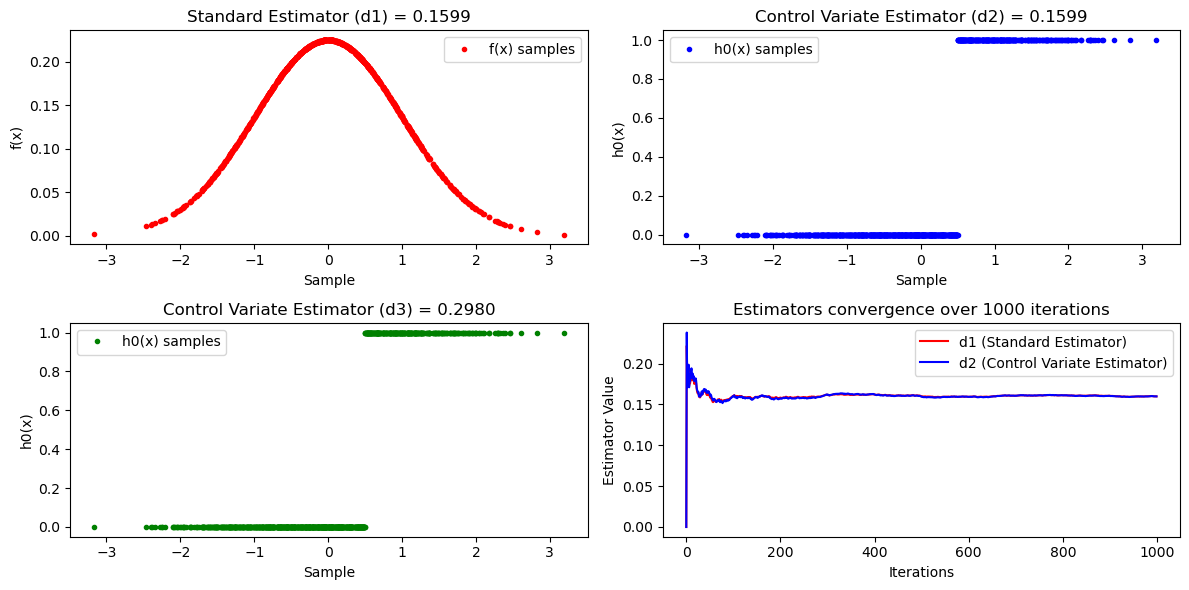

In [8]:
import random
import matplotlib.pyplot as plt

# Define the function for the original distribution (normal distribution)
def f(x):
    return 1 / (2 * 3.1415)**0.5 * 3.1415 ** (-0.5) * 2.71828**(-0.5 * x ** 2)

# Define the control variate function (indicator function for X > 0.5)
def h0(x):
    return 1 if x > 0.5 else 0

# Estimation function
def estimate_probability(n, a, f, h0):
    # Generate random samples
    samples = [random.gauss(0, 1) for _ in range(n)]  # Sample from N(0,1)
    
    # Estimate d1: Standard estimation without control variate (using f(x))
    d1 = sum([f(x) for x in samples]) / n
    
    # Estimate d3: Control variate estimator (using h0(x))
    d3 = sum([h0(x) for x in samples]) / n
    
    # Compute covariance (covariance between f(x) and h0(x))
    covariance = sum([(f(x) - d1) * (h0(x) - d3) for x in samples]) / n
    
    # Compute variance of h0(x)
    variance_h0 = sum([(h0(x) - d3) ** 2 for x in samples]) / n
    
    # Compute optimal beta
    beta_optimal = covariance / variance_h0
    
    # Compute the final control variate estimator
    d2 = d1 + beta_optimal * (d3 - sum([h0(x) for x in samples]) / n)
    
    return d1, d2, d3, beta_optimal, samples


# Define the threshold and number of samples
a = 0.5  # Threshold value for the indicator function
n = 1000  # Number of samples

# Run the estimation
d1, d2, d3, beta_optimal, samples = estimate_probability(n, a, f, h0)

# Print the results
print(f"Standard Estimator (d1): {d1}")
print(f"Control Variate Estimator (d2): {d2}")
print(f"Control Variate Estimator (d3): {d3}")
print(f"Optimal Beta (beta_optimal): {beta_optimal}")

# Plotting the results
# Plot the distribution of samples
plt.figure(figsize=(12, 6))

# Plot d1 (Standard estimator)
plt.subplot(2, 2, 1)
plt.plot(samples, [f(x) for x in samples], 'r.', label="f(x) samples")
plt.title(f"Standard Estimator (d1) = {d1:.4f}")
plt.xlabel("Sample")
plt.ylabel("f(x)")
plt.legend()

# Plot d2 (Control Variate Estimator)
plt.subplot(2, 2, 2)
plt.plot(samples, [h0(x) for x in samples], 'b.', label="h0(x) samples")
plt.title(f"Control Variate Estimator (d2) = {d2:.4f}")
plt.xlabel("Sample")
plt.ylabel("h0(x)")
plt.legend()

# Plot d3 (Control Variate Estimator without optimal beta)
plt.subplot(2, 2, 3)
plt.plot(samples, [h0(x) for x in samples], 'g.', label="h0(x) samples")
plt.title(f"Control Variate Estimator (d3) = {d3:.4f}")
plt.xlabel("Sample")
plt.ylabel("h0(x)")
plt.legend()

# Plot the values of the estimators over iterations to see variance reduction
plt.subplot(2, 2, 4)
iterations = list(range(n))  # Use 0-based indexing
d1_vals = [sum([f(x) for x in samples[:i]]) / i if i > 0 else 0 for i in iterations]
d2_vals = [d1_vals[i] + beta_optimal * (sum([h0(x) for x in samples[:i]]) / i - d3) if i > 0 else 0 for i in iterations]
plt.plot(iterations, d1_vals, label="d1 (Standard Estimator)", color='red')
plt.plot(iterations, d2_vals, label="d2 (Control Variate Estimator)", color='blue')
plt.title(f"Estimators convergence over {n} iterations")
plt.xlabel("Iterations")
plt.ylabel("Estimator Value")
plt.legend()

plt.tight_layout()
plt.show()
